In [1]:
# This script will create a table like this:
#|dataset_id|d_creation_date|d_last_modification_date|first_access_day|
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from algorithmUtils import *

In [20]:
def plot_deltas(days_path, dataset_dates_df, datatier, save):
    dataset_first_access = dict()
    for day in days_df.day_ts.values:
        #print(day)
        for dataset in days_df[days_df['day_ts'] == day].datasets_set.values[0]:
            if dataset not in dataset_first_access:
                dataset_first_access[dataset]=day
    first_access_df = pd.DataFrame(data=dataset_first_access.items(), columns=["d_dataset_id", "first_access_day"])
    all_dates = pd.merge(dataset_dates_df, first_access_df, how="right", on="d_dataset_id")
    if all_dates.isnull().values.any() == True:
        print("ERROR: There are NaNs after merge")
    
    # Calculate delta between first access and creation and last_modification dates
    all_dates['creation_delta_days'] = (all_dates['first_access_day'] - all_dates['d_creation_date'])/(3600*24) 
    all_dates['modification_delta_days'] = (all_dates['first_access_day'] - all_dates['d_last_modification_date'])/(3600*24) 
    
    # Create plots
    fig1 = plt.figure(figsize=(10,5))
    plt.hist('modification_delta_days', bins=100, data=all_dates)
    fig1.suptitle(datatier+" - modification_delta_days", fontsize=20)
    
    fig2 = plt.figure(figsize=(10,5))
    plt.hist('creation_delta_days', bins=100, data=all_dates)
    fig2.suptitle(datatier+" - creation_delta_days", fontsize=20)
    
    if save == True:
        filename1= "delta_modification_"+datatier+".png"
        filename2= "delta_creation_"+datatier+".png"
        fig1.savefig(filename1)
        fig2.savefig(filename2)

Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201904_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201903_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201810_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201902_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201905_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201811_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201809_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201808_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201806_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201901_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/d

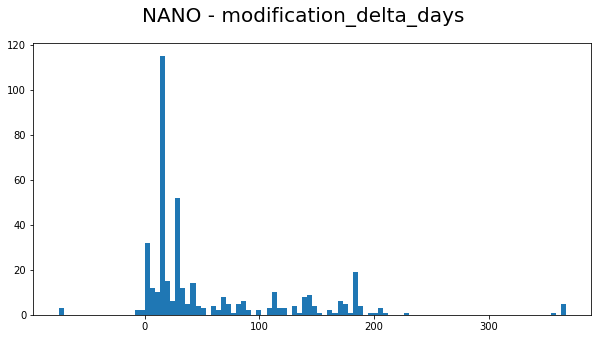

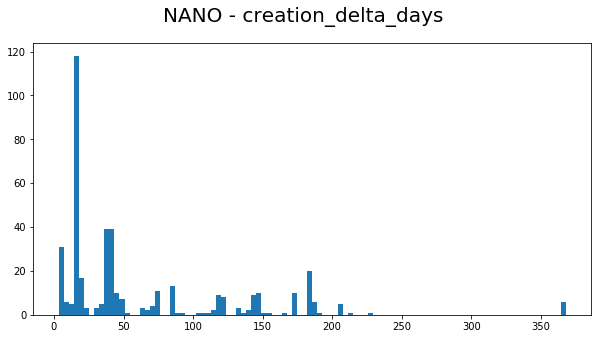

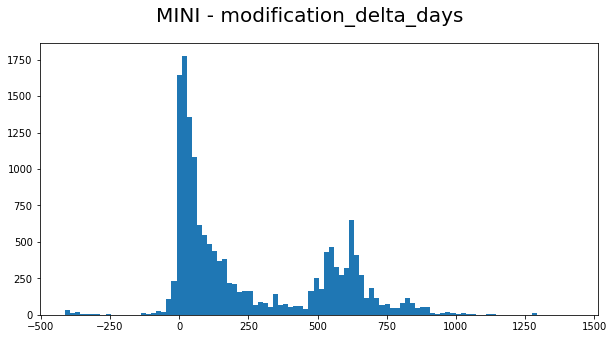

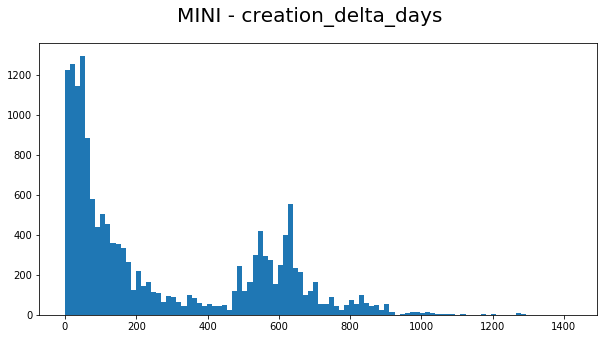

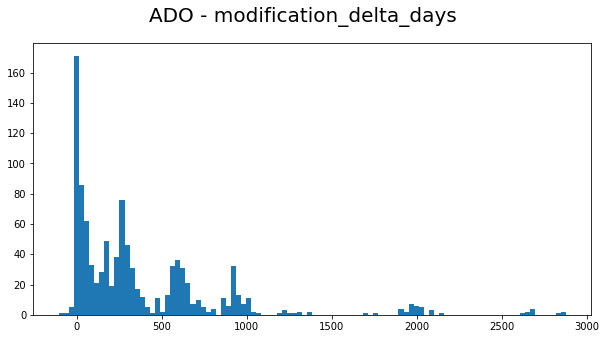

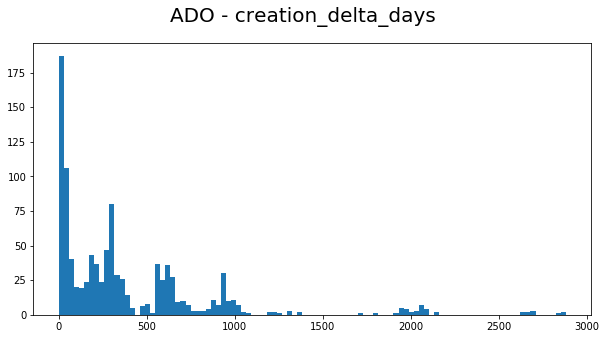

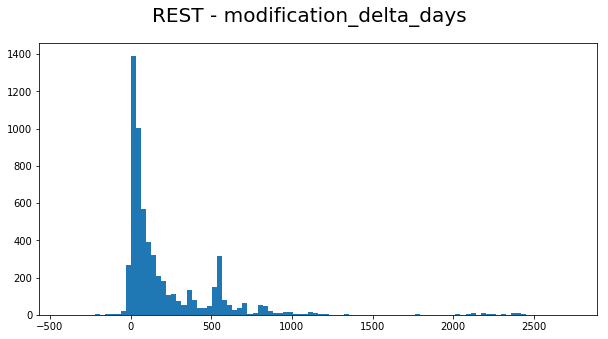

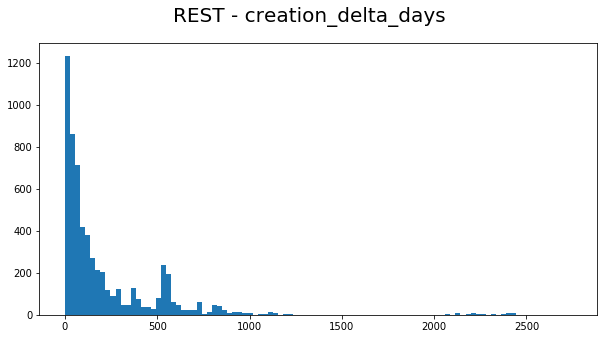

In [21]:
basepath="/Users/ddavila/projects/DOMA/data/model/"

dataset_dates_path = basepath + "dataset_dates.parquet"

datasets_size_path = basepath+"dataset.parquet"

dataset_dates_df = pd.read_parquet(dataset_dates_path)

for datatier in ["NANO", "MINI", "ADO", "REST"]:
#for datatier in ["NANO"]:
    days_path= basepath+"datatiers/data_tier_days_*_"+datatier+".parquet"
    days_df, _, _ = get_input_data(days_path, datasets_size_path)
    plot_deltas(days_df, dataset_dates_df, datatier, True)